In [1]:
from functions import *

In [2]:
def get_proposal_mat_quantum(m, gamma=0.7, t=1):
    '''Get a quantum proposal matrix for a given Ising model.'''

    H_zz = sum([-m.J_rescaled[i,j]*Z(i,m.n) @ Z(j,m.n) for i in range(m.n) for j in range(i+1,m.n)]) # note that the factor 1/2 is not needed here
    H_z = sum([-m.h_rescaled[i]*Z(i,m.n) for i in range(m.n)])
    H_x = sum([X(i,m.n) for i in range(m.n)])
    H = (1-gamma) *(H_zz + H_z) + gamma*H_x
    assert np.allclose(H.T, H), 'H must be symmetric.'
    
    proposal_mat = np.zeros((2**m.n, 2**m.n))
    for s in range(2**m.n):
        out_state = sparse_la.expm_multiply(-1j * H * t, get_basis_state(s,m.n))
        transitions = [np.abs(a)**2 for a in out_state]
        proposal_mat[:,s] = transitions

    assert is_stochastic(proposal_mat), 'Proposal matrix is not stochastic.'
    return proposal_mat

In [6]:
n = 5
m = RandomIsingModel(n)

In [20]:
# TODO: What does the proposal probability actually mean? How is it related to the perturbative analysis? Does it have anything to do with how common the energy eigenvalue is?

n_frames = 50
video = np.zeros((n_frames, 2**n, 2**n))
gammas = np.linspace(0.2,0.9,n_frames)
for gamma_index in range(n_frames):
    gamma = gammas[gamma_index]
    video[gamma_index] = get_proposal_mat_quantum(m, gamma=gamma)

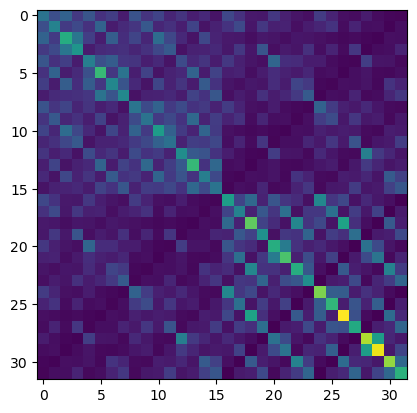

In [22]:
proposal_mat_quantum = get_proposal_mat_quantum(m)
plt.imshow(proposal_mat_quantum,)

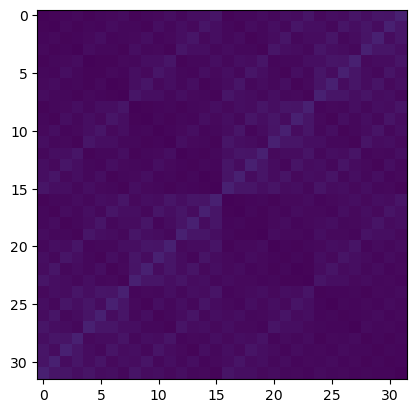

In [78]:
display_video(video)

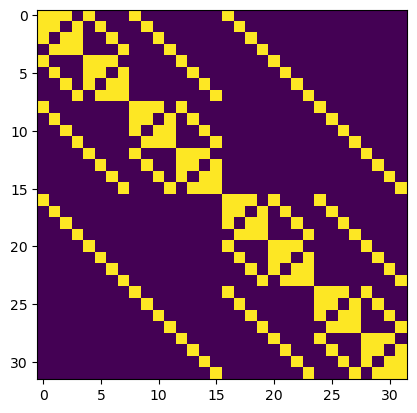

In [75]:
proposal_mat_local = get_proposal_mat_local(m, hamming_radius=1)
plt.imshow(proposal_mat_local,  interpolation='nearest')

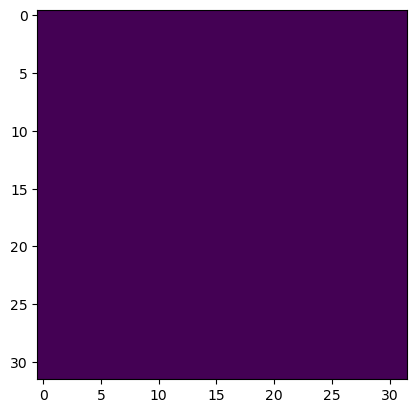

In [76]:
proposal_mat_random = get_proposal_mat_random(m)
plt.imshow(proposal_mat_random,  interpolation='nearest')